# Prohledávání do hloubky (DFS)

In [1]:
%matplotlib inline
from search import parse_state, is_goal, actions, move
from search import show_plan, visualize_search, log_search_step
import solutions

## Přiměřeně hrubá síla

Hladové plánování zkouší pouze jeden plán, zatímco algoritmus *Generuj a testuj* zkouší úplně všechny. Optimální přístup je někde mezi. Podobně jako při základní hrubé síle budeme zkoušet všechny možnosti, jak bychom se mohli dostat do cíle, nebudeme však postupovat po celých plánech, ale po jednotlivých stavech (pozicích na mřížce). Tím ušetříme spoustu zbytečné práce - když třeba po dvou krocích doleva narazíme na asteroid, nebudeme už zkoušet žádné plány, které začínají dvěma kroky doleva.

## Prohledávací strom

Při selhání hladového plánování jsme viděli, že nestačí uvažovat pouze jednu z dostupných akcí, že se občas prostě musíme "vrátit na rozcestí" a vykonat nějakou jinou akci, než kterou jsme vyzkoušeli předtím. Takovýto "průchod s návratem" lze reprezentovat pomocí tzv. *prohledávacího stromu* (anglicky *search tree*), ve kterém vrcholy reprezentují možné stavy a orientované hrany reprezentují akce, které převádějí jeden stav do druhého.

Následující obrázek ukazuje, jak může takový prohledávací strom vypadat. Čísla v modrých obdélníčcích určují pořadí, v jakém jsme stavy prohledávali, než jsme našli cílový stav c5. Malé červené čtverečky zobrazují stavy, které bychom prohledali v dalších krocích.
*(Pro vizualizaci jednotlivých kroků nastavte interactive=True).*

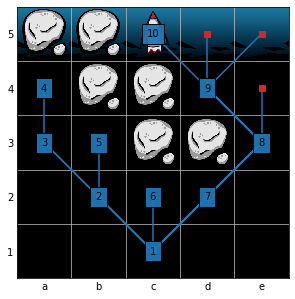

In [2]:
s = parse_state(
'|A|A| | | |'
'| |A|A| | |'
'| | |A|A| |'
'| | | | | |'
'| | |S| | |')
with visualize_search(s, interactive=False):
    solutions.dfs(s)

## Objevené = prozkoumané + okraj

Stavům, které jsou součástí prohledávacího stromu (modré i červené), říkáme *objevené*. V každém kroku prohledávání *expandujeme* jeden objevený stav, tj. do stromu zařadíme i jeho následníky. Expandované stavy se často označují jako <font color=blue>prozkoumané</font>. Skupině objevených, ale zatím neprozkoumaných stavů se říká <font color=red>okraj</font> (angl. *fringe*).

Každý stav, který je z počátečního stavu dosažitelný, tedy v průběhu prohledávání prochází 3 fázemi:
1. Neví se o něm.
2. Byl objeven! Stal se součástí prohledávácího stromu a je v <font color=red>okraji</font>.
3. Byl <font color=blue>prozkoumán</font> (expandován) a vyřazen z okraje.


## Stromové prohledávání

Obecné schéma *stromového prohledávání* (*tree search*) je následovné:
1. Zařaď do okraje počáteční stav.
2. Opakuj následující kroky, dokuď nenajdeš cíl.
3. Odeber jeden stav z okraje. Pokud je cílový, skonči.
4. Jinak ho expanduj, tj. zařaď do okraje jeho následníky.
5. Pokud se vyprázdnil okraj, tak cesta do cíle neexistuje.


## Grafové prohledávání

Pokud stavový prostor obsahuje orientované cykly,
což znamená, že se lze po několika akcích dostat zpět do stavu,
ve kterém jsme už byli, je navíc potřeba zařadit kontrolu,
abychom opakovaně neprozkoumávali již jednou prozkoumaný stav.
Tomuto rozšíření se říká *obecné grafové prohledávání*.

Náš stavový prostor obsahuje pouze cykly neorientované,
což znamená, že se lze do jednoho stavu dostat více cestami.
V takovém případě sice není kontrola opakovaných průzkumů nutná,
ale stále je užitečná, abychom se vyhli zbytečným výpočtům.

## Prohledávání do hloubky

Existuje několik variant grafového prohledávání lišících se ve strategii výběru stavu z okraje k prozkoumání (krok 3).
Vybírat vrchol z okraje lze i náhodně, chytřejším výběrem však můžeme dosáhnout lepších vlastností algoritmu.
Základní variantou s dobrou paměťovou složitostí je *prohledávání do hloubky* (anglicky *depth-first search*, DFS),
při kterém vybíráme z okraje ten stav, který jsme tam zařadili jako poslední.
(Jinými slovy: vždy prozkoumáváme naposledy objevený stav.)
Kroky prohledávání do hloubky můžete vidět i na výše uvedeném příkladě prohledávacího stromu. Rozmyslete si, proč se tomuto způsobu prohledávání říká *do hloubky*.

## Zásobník

Takového chování dosáhneme, když jako datovou strukturu pro okraj použijeme *zásobník* (anglicky *stack*), což je prostě seznam, do kterého přidáváme a odebíráme prvky na stejném konci, stejně jako u štosu knih nebo
talířů naskládaných do sebe. Podívejme se, jak můžeme se zásobníkem pracovat v Pythonu:

In [3]:
stack = ['a', 'b', 'c']  # vrchol zasobniku je vpravo ('c')
stack.append('d')  # pridani 'd' na vrchol zasobniku
print(stack)  # ['a', 'b', 'c', 'd']
stack.pop()  # odebrani prvku 'd' z vrcholu zasobniku
print(stack)  # ['a', 'b', 'c']
stack.pop()  # odebrani prvku 'c' z vrcholu zasobniku
print(stack)  # ['a', 'b']

['a', 'b', 'c', 'd']
['a', 'b', 'c']
['a', 'b']


Pořadí přidávání a odebírání prvků do zásobníku se označuje anglickou zkratkou LIFO (Last In - First Out).

## DFS krok za krokem

Nyní se podívejme na postup prohledávání do hloubky detailněji.
Spusťtě si následující plánování v interaktivním modu a nahlas říkejte, který stav se prozkoumá v příštím kroce a jak bude vypadat zásobník. 
Pro kontrolu budeme tyto informace také textově vypisovat (sloupec "fringe" značí okraj, což je v našem případě zásobník s vrcholem napravo, sloupec "plans" popisuje aktuální plány do všech zatím objevených vrcholů).

Explored: Fringe:              Plans:                 
0: -      [c1]                 c1:''                  
1: c1     [d2, c2, b2]         + d2:r, c2:f, b2:l     
2: b2     [d2, c2, b3, a3]     + b3:lf, a3:ll         
3: a3     [d2, c2, b3, a4]     + a4:llf               
4: a4     [d2, c2, b3]                                
5: b3     [d2, c2]                                    
6: c2     [d2]                                        
7: d2     [e3]                 + e3:rr                
8: e3     [e4, d4]             + e4:rrf, d4:rrl       
9: d4     [e4, e5, d5, c5]     + e5:rrlr, d5:rrlf, c5:rrll
10: c5    [e4, e5, d5]                                


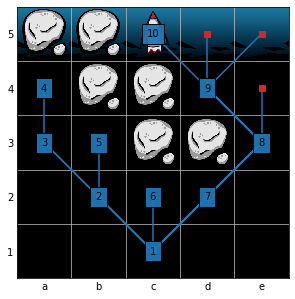

In [4]:
with visualize_search(s, text=True, interactive=False):
    solutions.dfs(s)

## Implementace

<div class="alert alert-block alert-success">
<b>Úkol 5.1: Prohledávání do hloubky</b><br/>
Implementujte funkci <i>dfs(initial_state)</i>,
která vrací plán pro cestu z <i>initial_state</i> do cílového stavu
nalezený pomocí prohledávání do hloubky.

<p>
Tipy:
<ul>
<li>Použijte zásobník pro ukládání stavů na okraji.</li>
<li>Pro každý objevený stav si uložte jeho plán do slovníku.<br>
    Vytvoření a uložení nového plánu provedete takto:<br>
    `plans[next_state] = plans[state] + action`.<br>
    Když pak najdete cílový stav, stačí vrátit `plans[state]`.
    </li>
<li>Akce můžete procházet v převráceném pořadí pomocí `reversed(actions(s))`.</li>
<li>Abyste zabránily opakovanému prozkoumávání stejných stavů,
    do kterých se lze dostat více cestami,
    přidávejte do zásobníku pouze ještě neobjevené stavy.
    Pro všechny objevené stavy máme nějaký plán,
    takže kontrola může vypadat takto:
    `if next_state not in plans: ...`.</li>
</ul>
</p>
</div>

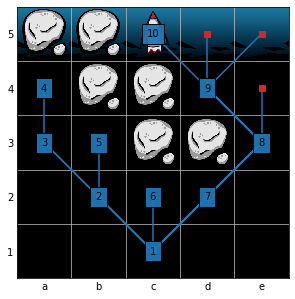

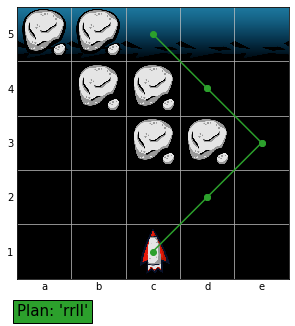

In [5]:
def dfs(initial_state):
    stack = [initial_state]
    plans = {initial_state: ''}
    log_search_step(None, stack, plans)
    while stack:
        state = stack.pop()
        # TODO: Implementujte DFS:
        # - Zkontrolujte, zda je stav cilovy (pokud ano, vratte plan).
        # - Pridejte na zasobnik vsechny jeho nasledniky,
        #   ktere jsme jeste neobjevili.
        # - Ulozte take plany do vsech novych stavu.
        log_search_step(state, stack, plans)  # vizualizace
            
state = parse_state(
'|A|A| | | |'
'| |A|A| | |'
'| | |A|A| |'
'| | | | | |'
'| | |S| | |')
with visualize_search(state, interactive=False):    
    plan = solutions.dfs(state)  # Vzorove reseni.
    # Vase reseni (preruseni pri zacykleni: Kernel > Iterrupt)
    #plan = dfs(state)
show_plan(state, plan)

## Ne tak úplně do hloubky

Přestože uvedená verze prohledávání do hloubky je pro hledání plánu běžně používána, ve skutečnosti nejde o zcela správné DFS.

Při správném DFS nepřidáváme do okraje všechny následníky najednou,
ale vždy pouze jednoho a současně tam ponecháváme prozkoumávaný stav
(pokud ještě měl nějakého následníka, jinak už je zcela prozkoumaný a můžeme ho ze zásobníku odstranit). Dá se říct, že jednotkou průzkumu není celý stav, ale jedna akce.

Tohoto chování lze velmi jednoduše dosáhnout při rekurzivní implementaci. Iterativní verze vyžaduje zamyšlení a o kousek složitější kód.

Při hledání plánu je tato odchylka nepodstatná, ale pro jiné aplikace DFS (v nichž pracujeme s tím, kdy stav objevíme a kdy dokončíme jeho průzkum) by nesprávné pořadí průchodu vadilo.

## Nevýhoda DFS

Věděli jste, že v našem vesmírném světě se můžou vyskoutnout i červí díry?
Pokud vletíte do jednoho konce červí díry, objevíte se vzápětí na jejím druhém konci.
Díky červím dírám můžou mít cesty do cíle výrazně různou délku
a my bychom chtěli najít co nejkratší.
Nalezení nejkratšího řešení ale DFS negarantuje.
V nejhorším případě může prozkoumat všechny možné stavy, než najde
cíl, a to i v případě, že cíl se nachází kousíček od počátečního stavu.

V následujícím světě najde DFS 5-krokový plán do cíle. Kolik kroků má plán nejkratší?

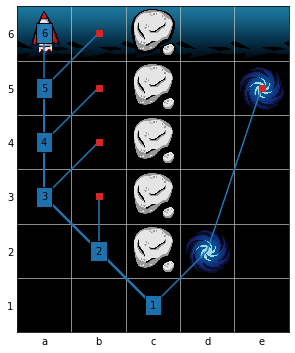

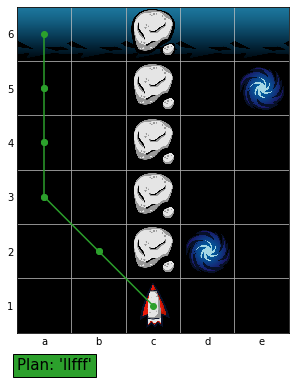

In [6]:
state = parse_state(
'| | |A| | |'
'| | |A| |W|'
'| | |A| | |'
'| | |A| | |'
'| | |A|W| |'
'| | |S| | |')
with visualize_search(state, interactive=False):
     plan = solutions.dfs(state)
show_plan(state, plan)

V příští části si ukážeme, jak se dá prohledávání upravit, abychom našli nejkratší plán, bude to však za cenu horší paměťové složitosti.

## Shrnutí

<div class="alert alert-block alert-info">
<ul>
<li>
Při stromovém prohledávání si udržujeme množinu vrcholů,
které chceme v budoucnu prozkoumat (okraj). V každém kroku jeden
vrchol z okraje odebereme a do okraje zařadíme jeho následníky.
</li>
<li>
DFS je varianta stromového prohledávání, při které prozkoumáváme ten vrchol, který jsme do okraje zařadili jako poslední.
</li>
<li>
DFS má při správné implementaci dobrou paměťovou složitost. Časová složitost je horší - v nejhorším případě musí prozkoumat všechny možné stavy.
</li>
<li>
Pokud můžou mít řešení různé délky, DFS nemusí najít to nejkratší.
</li>
</ul>
</div>

Jak najít vždy to nejkratší řešení? [06 - Prohledávání do šířky](./06-breadth-first-search.ipynb).